In [1]:
import pm4py
import os

In [2]:
log = pm4py.read_xes(os.path.join("data", "BPI_Challenge_2019-3-w-after.xes.gz"))

parsing log, completed traces ::   0%|          | 0/15182 [00:00<?, ?it/s]

In [60]:
pn_name = "petri-net-aitb_000"

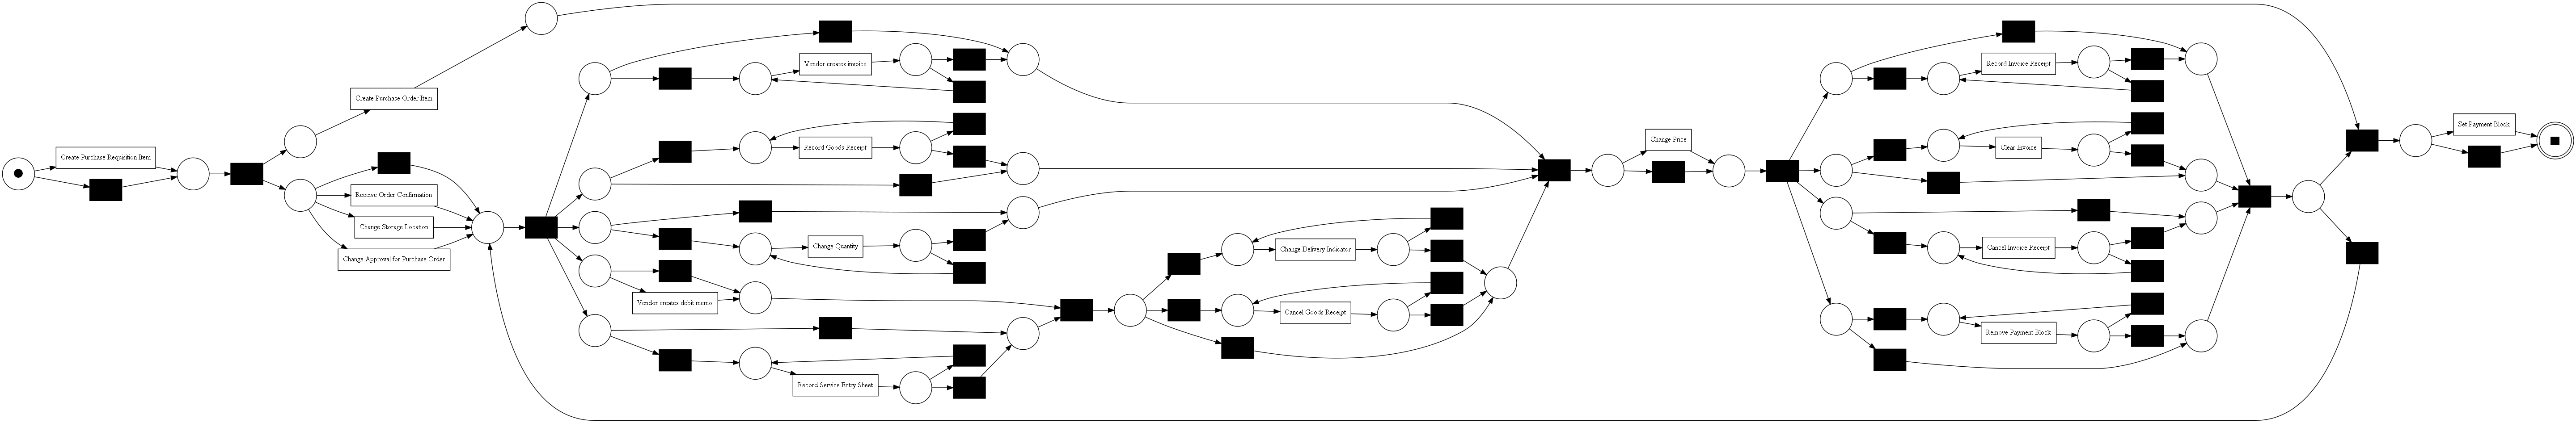

In [61]:
net, im, fm = pm4py.read_pnml(os.path.join("pn",pn_name + ".pnml"))
pm4py.view_petri_net(net, im, fm)

# Token-based replay

In [62]:
replayed_traces = pm4py.conformance_diagnostics_token_based_replay(log, net, im, fm)

replaying log with TBR, completed variants ::   0%|          | 0/4228 [00:00<?, ?it/s]

In [63]:
missing_tokens = 0
consumed_tokens = 0
remaining_tokens = 0
produced_tokens = 0

for trace in replayed_traces:
    missing_tokens += trace["missing_tokens"]
    consumed_tokens += trace["consumed_tokens"]
    remaining_tokens += trace["remaining_tokens"]
    produced_tokens += trace["produced_tokens"]

first_eq = 0.5 * (1 - float(missing_tokens)/float(consumed_tokens))
second_eq = 0.5 * (1 - float(remaining_tokens)/float(produced_tokens))

token_based_fitness = first_eq + second_eq

str((token_based_fitness, missing_tokens, consumed_tokens, remaining_tokens, produced_tokens))

'(0.9999188315763577, 97, 1195046, 97, 1195046)'

# Footprints

In [64]:
from pm4py.algo.discovery.footprints import algorithm as footprints_discovery
fp_log = footprints_discovery.apply(log, variant=footprints_discovery.Variants.ENTIRE_EVENT_LOG)
fp_trace_by_trace = footprints_discovery.apply(log, variant=footprints_discovery.Variants.TRACE_BY_TRACE)
fp_net = footprints_discovery.apply(net, im, fm)

In [65]:
conf_fp = pm4py.conformance_diagnostics_footprints(fp_trace_by_trace, fp_net)

In [66]:
from pm4py.algo.conformance.footprints import algorithm as fp_conformance
from pm4py.algo.conformance.footprints.util import evaluation

conf_result = fp_conformance.apply(fp_log, fp_net, variant=fp_conformance.Variants.LOG_EXTENSIVE)

footprint_based_fitness = evaluation.fp_fitness(fp_log, fp_net, conf_result)
footprint_based_precision = evaluation.fp_precision(fp_log, fp_net)

In [67]:
(footprint_based_fitness, footprint_based_precision)

(0.9739353829075836, 0.7386363636363636)

In [68]:
print(pn_name)
print("    Token-based fitness: " + str(token_based_fitness))
print("    Footprint-based fitness: " + str(footprint_based_fitness))
print("    Footprint-based precision: " + str(footprint_based_precision))

petri-net-aitb_000
    Token-based fitness: 0.9999188315763577
    Footprint-based fitness: 0.9739353829075836
    Footprint-based precision: 0.7386363636363636


# Alignments

In [ ]:
from pm4py.algo.conformance.alignments.petri_net import algorithm as alignments

aligned_traces = alignments.apply_log(log, net, im, fm)

from pm4py.algo.evaluation.replay_fitness import algorithm as replay_fitness
log_fitness = replay_fitness.evaluate(aligned_traces, variant=replay_fitness.Variants.ALIGNMENT_BASED)

print(log_fitness)

aligning log, completed variants ::   0%|          | 0/4228 [00:00<?, ?it/s]